# Corn data example
Data is from https://www.genetics.org/content/suppl/2010/09/02/genetics.110.118521.DC1

Formatted by https://github.com/rileymcdowell/genomic-neuralnet


Species: Corn

Number of instances (different varieties): 264

Number of features (SNPs): 1134

Trait of interest: yield (continuous variable: weight/area)


In [1]:
# import warnings filter
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

In [2]:
import pandas as pd
import numpy as np
data = pd.read_csv("Genotyped.csv", index_col='index')
data

,wPt.0538,wPt.8463,wPt.6348,wPt.9992,wPt.2838,wPt.8266,wPt.1100,wPt.0653,wPt.4418,wPt.2152,...,c.408290,c.408294,c.408330,c.408336,c.408375,c.408393,c.408422,c.408424,c.408426,c.408443
index,,,,,,,,,,,,,,,,,,,,,
1,0,1,1,1,1,0,1,1,1,1,...,1,0,1,1,1,0,0,0,0,1
2,1,1,1,1,1,0,1,1,0,1,...,1,1,0,0,0,0,1,1,1,1
3,1,1,1,1,1,0,1,1,0,1,...,1,1,0,0,0,0,1,1,1,1
4,0,1,1,1,1,0,1,1,1,1,...,1,1,1,1,0,0,1,0,1,0
5,0,1,1,1,1,0,1,1,1,1,...,1,1,1,1,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,1,1,1,1,1,0,1,1,0,1,...,1,0,0,1,0,0,1,0,1,1
596,0,1,1,1,1,0,1,1,1,1,...,1,0,1,1,0,0,0,1,0,1
597,0,1,1,1,1,1,1,1,1,1,...,1,0,1,1,0,0,1,1,1,1


In [3]:
output = pd.read_csv("Phenotypes.csv")
output

,V1,V2,V3,V4,average phenotypes
0,1.671629,-1.727470,-1.890285,0.050916,-0.648708
1,-0.252703,0.409522,0.309386,-1.738759,0.155402
2,0.341815,-0.648626,-0.799559,-1.053569,-0.368790
3,0.785439,0.093949,0.570468,0.551757,0.483285
4,0.998318,-0.282481,1.618682,-0.114285,0.778173
...,...,...,...,...,...
594,-1.248504,1.419042,1.574549,1.659656,0.581695
595,-1.052126,0.082785,2.138355,0.554385,0.389671
596,-1.209974,0.451963,2.022570,1.848717,0.421519
597,-0.902397,0.527907,1.719077,2.692814,0.448196


In [4]:
X = data
y = output.iloc[:,-1]
X,y

(       wPt.0538  wPt.8463  wPt.6348  wPt.9992  wPt.2838  wPt.8266  wPt.1100  \
 index                                                                         
 1             0         1         1         1         1         0         1   
 2             1         1         1         1         1         0         1   
 3             1         1         1         1         1         0         1   
 4             0         1         1         1         1         0         1   
 5             0         1         1         1         1         0         1   
 ...         ...       ...       ...       ...       ...       ...       ...   
 595           1         1         1         1         1         0         1   
 596           0         1         1         1         1         0         1   
 597           0         1         1         1         1         1         1   
 598           1         0         1         1         1         0         1   
 599           1         1         1    

SNPs are encoded: 0 means heterozygous and 1/-1 mean homozygous.  e.g.:
* -1: AA
* 0: AT
* 1: TT


# Initial data visualization

<IPython.core.display.Javascript object>


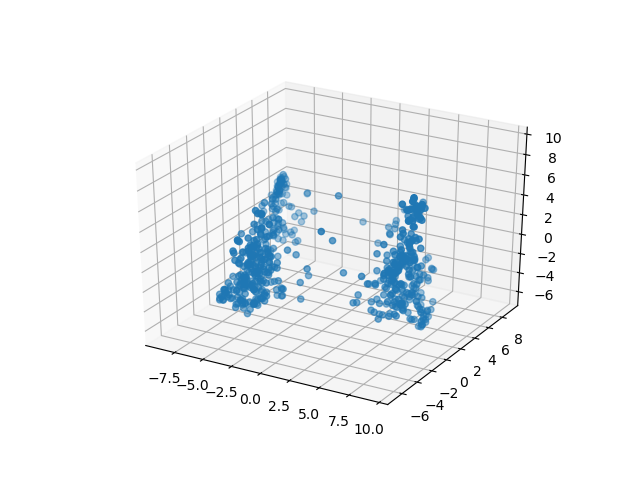

In [5]:
import matplotlib.pyplot as plt
%matplotlib notebook
%matplotlib notebook

from sklearn.decomposition import PCA
from mpl_toolkits import mplot3d

fig = plt.figure()
ax= plt.axes(projection='3d')

pca = PCA(n_components=3)
pca.fit(X)
X_pca = pca.transform(X)

ax.scatter3D(X_pca[:, 0], X_pca[:, 1], X_pca[:,2])
plt.show()

<IPython.core.display.Javascript object>


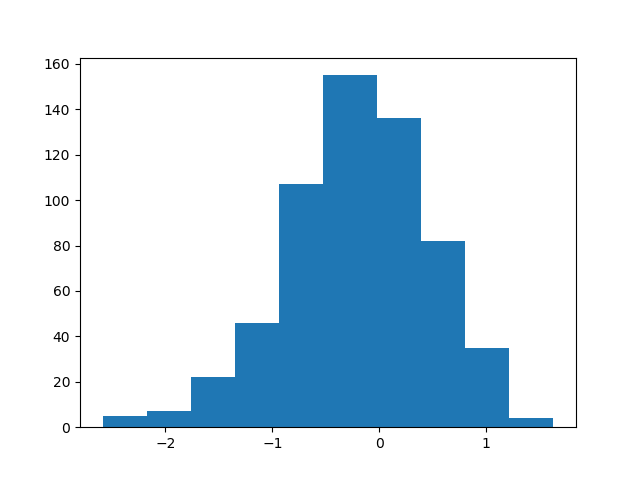

In [6]:
import numpy as np
hist, bin_edges = np.histogram(y)
fig = plt.figure()
plt.bar(bin_edges[:-1], hist, width=0.5)
plt.show()

In [7]:

from sklearn.model_selection import train_test_split

split = 0.2 # use 20% of the data for testing.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split, random_state=42)


running this next cell takes around 2 minutes...

In [8]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

classifier = XGBRegressor(objective ='reg:squarederror')
grid = {
    'n_estimators': [10,50,100],
    'max_depth' : [4,5,7,10],
    'learning_rate' : [0.0001, 0.001, 0.01]
}

gd_sr = GridSearchCV(estimator=classifier,
                       param_grid=grid,
                       scoring='r2', # note the use of scoring here.
                       cv=5, iid=False)


gd_sr.fit(X_train, y_train)

best_parameters = gd_sr.best_params_
print(best_parameters)
 


{'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 100}


In [9]:
best_clf = XGBRegressor(objective='reg:squarederror',
                        n_estimators=best_parameters['n_estimators'], 
                        max_depth=best_parameters['max_depth'], 
                        learning_rate=best_parameters['learning_rate'])

# has best set of parameters, now retrain on all training data.

best_clf.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.01, max_delta_step=0,
             max_depth=4, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [11]:
y_pred = best_clf.predict(X_test)
y_pred_tr = best_clf.predict(X_train)

# How did we do?

plot actual values vs predcited for training set.

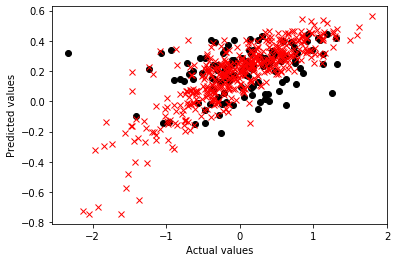

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.plot(y_test, y_pred, 'o', color='black')
plt.plot(y_train,y_pred_tr, 'x', color='red')
plt.show()



In [13]:
from sklearn.metrics import r2_score
# we use r2 because we are doing regression, not classification
print('Training set:',r2_score(y_train,y_pred_tr))
print('Test set:',r2_score(y_test,y_pred))

Training set: 0.32455424788115683
Test set: 0.057979114874756266


It's not predicting in the full range

# Use SVM, Feature Selection and Feature Extraction

First, take some data to do feature selection

Remember X_train, y_train are our data sets

In [23]:

from sklearn.feature_selection import SelectKBest, f_regression

# do train-test split to get sample to do feature selection

split= 0.20 # use 20% for feature selection
X_train_FS, X_FS, y_train_FS, y_FS = train_test_split(X_train, y_train, test_size=split)

print('before selecting:', X_train_FS.shape)
skb = SelectKBest(f_regression, k=500)
skb.fit(X_FS,y_FS)
X_train_FS = skb.transform(X_train_FS)
print('after selecting:', X_train_FS.shape)


before selecting: (383, 1279)
after selecting: (383, 500)


C:\Users\SkyMa\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:299: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
C:\Users\SkyMa\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
C:\Users\SkyMa\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:304: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
C:\Users\SkyMa\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\SkyMa\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\SkyMa\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid val

This next cell takes around 2 minutes. 
This is even though we have reduced the number of features to 500.

In [24]:
from sklearn.svm import SVR

classifier = SVR(kernel='linear') 

grid = {
    'C' : [10**i for i in range(-10,10,1)] 
   }

gd_sr = GridSearchCV(estimator=classifier,
                       param_grid=grid,
                       scoring='r2', # note the use of scoring here.
                       cv=5, iid=False)


gd_sr.fit(X_train_FS, y_train_FS)

best_parameters = gd_sr.best_params_
print(best_parameters)
 


{'C': 0.001}


In [25]:
best_clf = SVR(kernel='linear',C=best_parameters['C'])
best_clf.fit(X_train,y_train)


SVR(C=0.001, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [26]:
y_pred = best_clf.predict(X_test)
y_pred_tr = best_clf.predict(X_train)

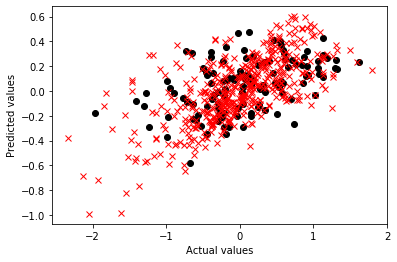

In [27]:
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.plot(y_test, y_pred, 'o', color='black')
plt.plot(y_train,y_pred_tr, 'x', color='red')

plt.show()


In [28]:
print('Training set:',r2_score(y_train,y_pred_tr))
print('Test set:',r2_score(y_test,y_pred))

Training set: 0.3652437671362223
Test set: 0.19334653584944783


In [29]:
from sklearn.feature_selection import RFE
sel = RFE(best_clf,20,5)

In [30]:
sel = sel.fit(X_test, y_test)

In [31]:
print(np.argwhere(sel.ranking_ == 1).ravel()) # this code finds the feature numbers that are ranked first

[ 143  166  196  200  241  337  360  414  629  643  689  753  772  782
  993 1101 1114 1195 1196 1273]


# can we do better with RBF kernel?

In [33]:
classifier = SVR(kernel='rbf') 

grid = {
    'C' : [10**i for i in range(-10,10,2)] ,
    'gamma' : [2**i for i in range(-10,10,2)]
   }

gd_sr = GridSearchCV(estimator=classifier,
                       param_grid=grid,
                       scoring='r2', # note the use of scoring here.
                       cv=5, iid=False)


gd_sr.fit(X_train_FS, y_train_FS)

best_parameters = gd_sr.best_params_
print(best_parameters)
 


{'C': 1, 'gamma': 0.00390625}


In [34]:
best_clf = SVR(kernel='rbf',C=best_parameters['C'])
best_clf.fit(X_train,y_train)


SVR(C=1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

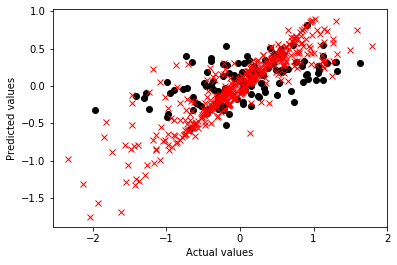

In [35]:
y_pred = best_clf.predict(X_test)
y_pred_tr = best_clf.predict(X_train)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.plot(y_test, y_pred, 'o', color='black')
plt.plot(y_train,y_pred_tr, 'x', color='red')

plt.show()


In [36]:
print('Training set:',r2_score(y_train,y_pred_tr))
print('Test set:',r2_score(y_test,y_pred))

Training set: 0.749998814480968
Test set: 0.2753396536563397


We can't easily do feature ranking with an RBF kernel.

#### From conversation
* SVR(kernel="")
* do another visualization
* put it into bins
    * discrete number of bins
    * put into the plot
    * put colors into 3d graph
    * prediction to different halfs
* Suggestions
    * stratification (Cross validation)
    * equal proportion on 0 and 1
* Smarter to look at what is data telling us

similar to XGBoost
models for a lot of features
random forest!!
manage overfeeting
n-nearest neighbors
grid search with a num